findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

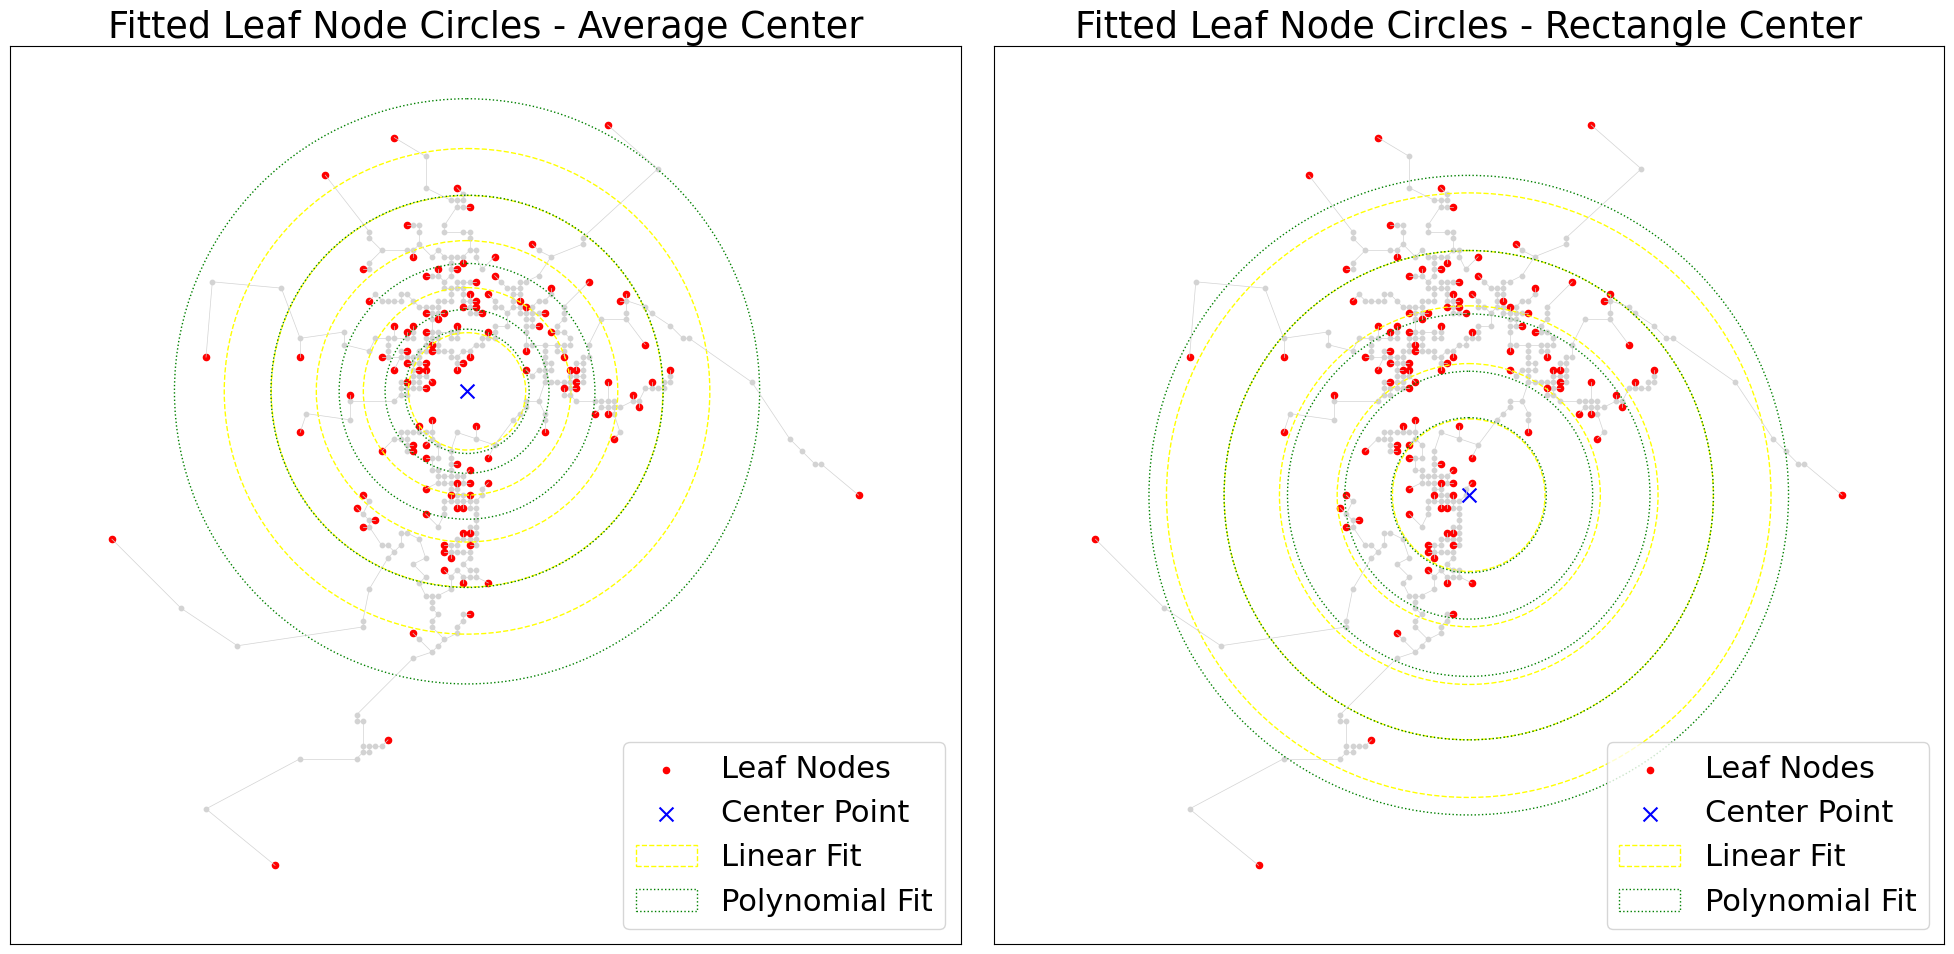

In [2]:
from graph_tool.all import Graph, graph_draw
import numpy as np
import python_codes.files_operators as fo
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 设置字体和比例
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 22

# 读取网络文件
filename = "./MST_net/tokyo_pop_500_mst.net"
read_graph, read_pos = fo.read_files(filename)

# 找出叶节点（只有一个相邻节点的节点）
leaf_nodes = [v for v in read_graph.vertices() if v.out_degree() == 1]
leaf_positions = np.array([read_pos[v] for v in leaf_nodes])

# 计算中心点
center_avg = np.mean(leaf_positions, axis=0)  # 平均值中心
x_min, y_min = np.min(leaf_positions, axis=0)
x_max, y_max = np.max(leaf_positions, axis=0)
center_rect = np.array([(x_min + x_max) / 2, (y_min + y_max) / 2])  # 最小矩形中心

# 绘制叶节点及同心圆结构
fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # 缩小比例

for ax, center, title in zip(axs, [center_avg, center_rect], ["Average Center", "Rectangle Center"]):
    # 计算叶节点距离中心点的距离
    distances = np.linalg.norm(leaf_positions - center, axis=1)
    sorted_distances = np.sort(distances)
    num_points = len(sorted_distances)

    # 线性拟合
    X = np.arange(1, num_points + 1).reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, sorted_distances)
    linear_fitted = linear_regressor.predict(X)

    # 多项式拟合（使用二次拟合）
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_poly, sorted_distances)
    poly_fitted = poly_regressor.predict(X_poly)

    # 绘制整个网络（灰色节点和边）
    for edge in read_graph.edges():
        source = read_pos[edge.source()]
        target = read_pos[edge.target()]
        ax.plot([source[0], target[0]], [source[1], target[1]], color="lightgray", linewidth=0.5)

    # 绘制所有节点（灰色）
    for v in read_graph.vertices():
        pos = read_pos[v]
        ax.scatter(pos[0], pos[1], color="lightgray", s=10)

    # 绘制叶节点（红色）
    ax.scatter(leaf_positions[:, 0], leaf_positions[:, 1], color="red", label="Leaf Nodes", s=20)

    # 绘制中心点（蓝色）
    ax.scatter(center[0], center[1], color="blue", marker="x", s=100, label="Center Point")

    # 绘制线性拟合的同心圆
    for i in range(1, 6):
        radius = linear_fitted[int((i / 5) * num_points) - 1]
        circle = plt.Circle(center, radius, color="yellow", fill=False, linestyle="--", label="Linear Fit" if i == 1 else "")
        ax.add_artist(circle)

    # 绘制多项式拟合的同心圆
    for i in range(1, 6):
        radius = poly_fitted[int((i / 5) * num_points) - 1]
        circle = plt.Circle(center, radius, color="green", fill=False, linestyle=":", label="Polynomial Fit" if i == 1 else "")
        ax.add_artist(circle)

    ax.set_title(f"Fitted Leaf Node Circles - {title}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', adjustable='datalim')  # 保持比例
    ax.invert_yaxis()
    ax.legend()

plt.tight_layout()
plt.show()


Average Center: 自动识别出 1 个圆环
Rectangle Center: 自动识别出 1 个圆环


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

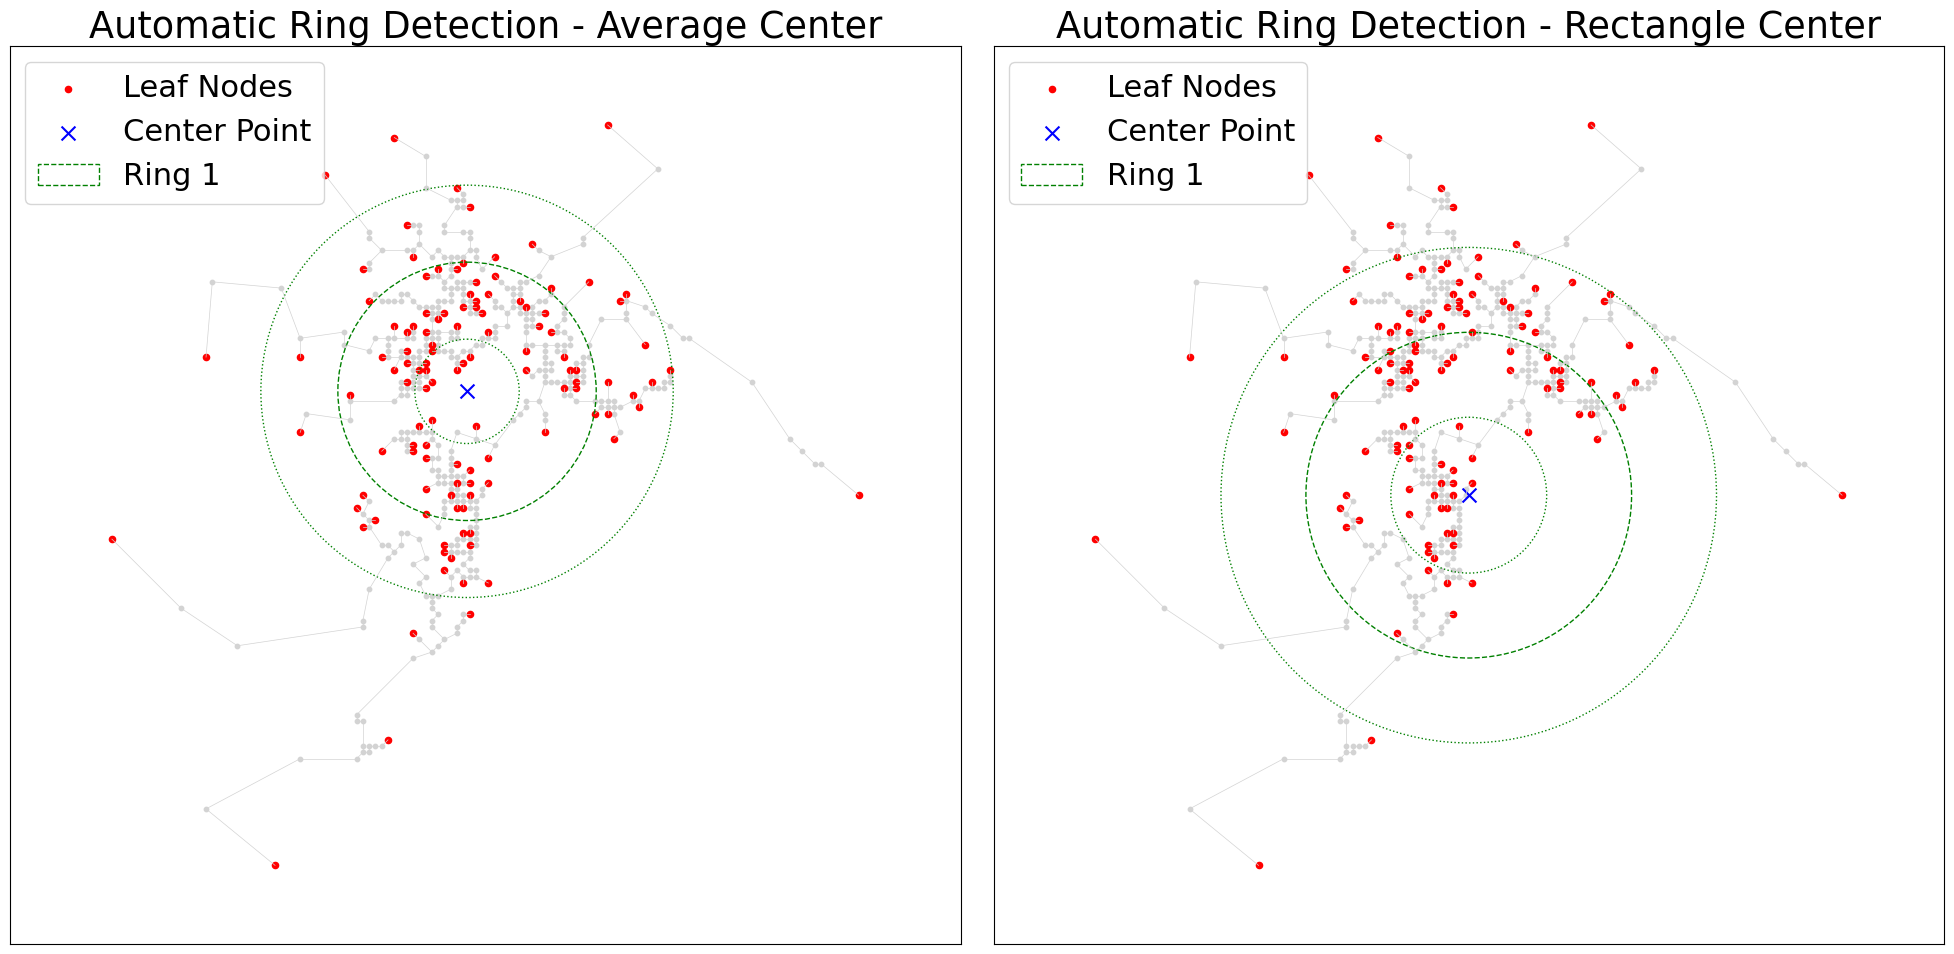

In [5]:
from graph_tool.all import Graph, graph_draw
import numpy as np
import python_codes.files_operators as fo
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# 设置字体和比例
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 22

# 读取网络文件
filename = "./MST_net/tokyo_pop_500_mst.net"
read_graph, read_pos = fo.read_files(filename)

# 找出叶节点（只有一个相邻节点的节点）
leaf_nodes = [v for v in read_graph.vertices() if v.out_degree() == 1]
leaf_positions = np.array([read_pos[v] for v in leaf_nodes])

# 计算两种中心点
center_avg = np.mean(leaf_positions, axis=0)  # 平均值中心
x_min, y_min = np.min(leaf_positions, axis=0)
x_max, y_max = np.max(leaf_positions, axis=0)
center_rect = np.array([(x_min + x_max) / 2, (y_min + y_max) / 2])  # 最小矩形中心

# 绘制两个中心点的图像对比
fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # 调整比例

for ax, center, title in zip(axs, [center_avg, center_rect], ["Average Center", "Rectangle Center"]):
    # 计算叶节点距离中心点的距离
    distances = np.linalg.norm(leaf_positions - center, axis=1)

    # 使用DBSCAN进行聚类识别圆环结构
    db = DBSCAN(eps=20, min_samples=5).fit(distances.reshape(-1, 1))  # 20是距离阈值，5是最小样本数
    labels = db.labels_

    # 计算识别的圆环数量
    num_circles = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"{title}: 自动识别出 {num_circles} 个圆环")

    # 绘制整个网络（灰色节点和边）
    for edge in read_graph.edges():
        source = read_pos[edge.source()]
        target = read_pos[edge.target()]
        ax.plot([source[0], target[0]], [source[1], target[1]], color="lightgray", linewidth=0.5)

    # 绘制所有节点（灰色）
    for v in read_graph.vertices():
        pos = read_pos[v]
        ax.scatter(pos[0], pos[1], color="lightgray", s=10)

    # 绘制叶节点（红色）
    ax.scatter(leaf_positions[:, 0], leaf_positions[:, 1], color="red", label="Leaf Nodes", s=20)

    # 绘制中心点（蓝色）
    ax.scatter(center[0], center[1], color="blue", marker="x", s=100, label="Center Point")

    # 绘制自动识别的圆环
    for circle_label in set(labels):
        if circle_label == -1:
            continue  # 跳过噪声点
        cluster_indices = np.where(labels == circle_label)[0]
        cluster_distances = distances[cluster_indices]
        mean_radius = np.mean(cluster_distances)
        std_radius = np.std(cluster_distances)

        # 绘制平均半径圆环
        circle = plt.Circle(center, mean_radius, color="green", fill=False, linestyle="--", label=f"Ring {circle_label+1}")
        ax.add_artist(circle)
        
        # 绘制标准差范围
        circle_inner = plt.Circle(center, mean_radius - std_radius, color="green", fill=False, linestyle=":")
        circle_outer = plt.Circle(center, mean_radius + std_radius, color="green", fill=False, linestyle=":")
        ax.add_artist(circle_inner)
        ax.add_artist(circle_outer)

    ax.set_title(f"Automatic Ring Detection - {title}")
    ax.set_xticks([])  # 去除X坐标刻度
    ax.set_yticks([])  # 去除Y坐标刻度
    ax.set_aspect('equal', adjustable='datalim')  # 保持比例
    ax.invert_yaxis()  # 上下翻转Y轴，解决图像倒置问题
    ax.legend()

plt.tight_layout()
plt.show()


Average Center: 自动识别出 10 个圆环
Rectangle Center: 自动识别出 10 个圆环


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

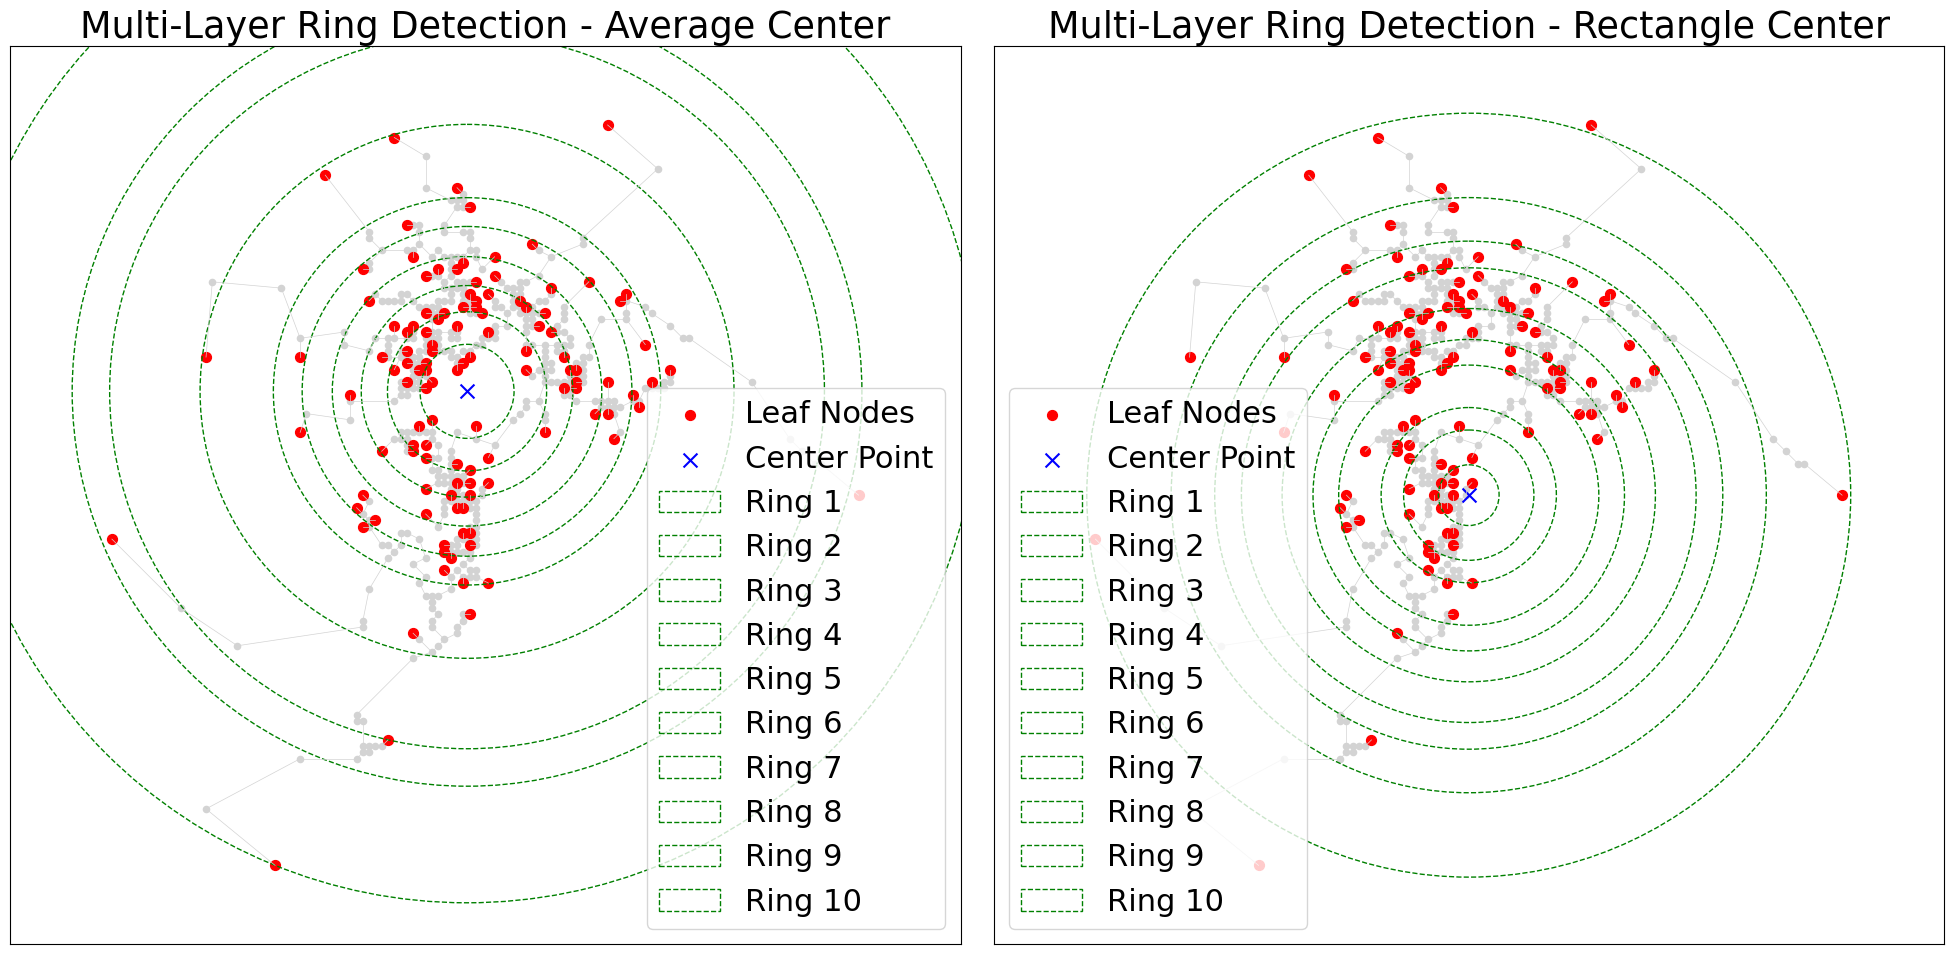

In [6]:
from graph_tool.all import Graph, graph_draw
import numpy as np
import python_codes.files_operators as fo
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 设置字体和比例
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 22

# 读取网络文件
filename = "./MST_net/tokyo_pop_500_mst.net"
read_graph, read_pos = fo.read_files(filename)

# 找出叶节点（只有一个相邻节点的节点）
leaf_nodes = [v for v in read_graph.vertices() if v.out_degree() == 1]
leaf_positions = np.array([read_pos[v] for v in leaf_nodes])

# 计算两种中心点
center_avg = np.mean(leaf_positions, axis=0)  # 平均值中心
x_min, y_min = np.min(leaf_positions, axis=0)
x_max, y_max = np.max(leaf_positions, axis=0)
center_rect = np.array([(x_min + x_max) / 2, (y_min + y_max) / 2])  # 最小矩形中心

# 绘制两个中心点的图像对比
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

for ax, center, title in zip(axs, [center_avg, center_rect], ["Average Center", "Rectangle Center"]):
    # 计算叶节点距离中心点的距离
    distances = np.linalg.norm(leaf_positions - center, axis=1)
    
    # 选择合理的圆环数量（KMeans自动聚类）
    optimal_clusters = min(10, len(leaf_positions) // 10)  # 自动设定聚类数量
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42).fit(distances.reshape(-1, 1))
    labels = kmeans.labels_

    # 聚类中心（圆环半径）
    cluster_centers = kmeans.cluster_centers_
    sorted_centers = np.sort(cluster_centers.flatten())  # 从大到小排序

    print(f"{title}: 自动识别出 {len(sorted_centers)} 个圆环")

    # 绘制整个网络（灰色节点和边）
    for edge in read_graph.edges():
        source = read_pos[edge.source()]
        target = read_pos[edge.target()]
        ax.plot([source[0], target[0]], [source[1], target[1]], color="lightgray", linewidth=0.5)

    # 绘制所有节点（灰色）
    for v in read_graph.vertices():
        pos = read_pos[v]
        ax.scatter(pos[0], pos[1], color="lightgray", s=20)

    # 绘制叶节点（红色）
    ax.scatter(leaf_positions[:, 0], leaf_positions[:, 1], color="red", label="Leaf Nodes", s=50)

    # 绘制中心点（蓝色）
    ax.scatter(center[0], center[1], color="blue", marker="x", s=100, label="Center Point")

    # 绘制自动识别的圆环
    for i, radius in enumerate(sorted_centers):
        circle = plt.Circle(center, radius, color="green", fill=False, linestyle="--", label=f"Ring {i+1}")
        ax.add_artist(circle)

    ax.set_title(f"Multi-Layer Ring Detection - {title}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', adjustable='datalim')
    ax.invert_yaxis()
    ax.legend()

plt.tight_layout()
plt.show()


Average Center: Best number of rings = 4, Silhouette Score = 0.60, Leaf Nodes = 117
Rectangle Center: Best number of rings = 7, Silhouette Score = 0.62, Leaf Nodes = 117


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

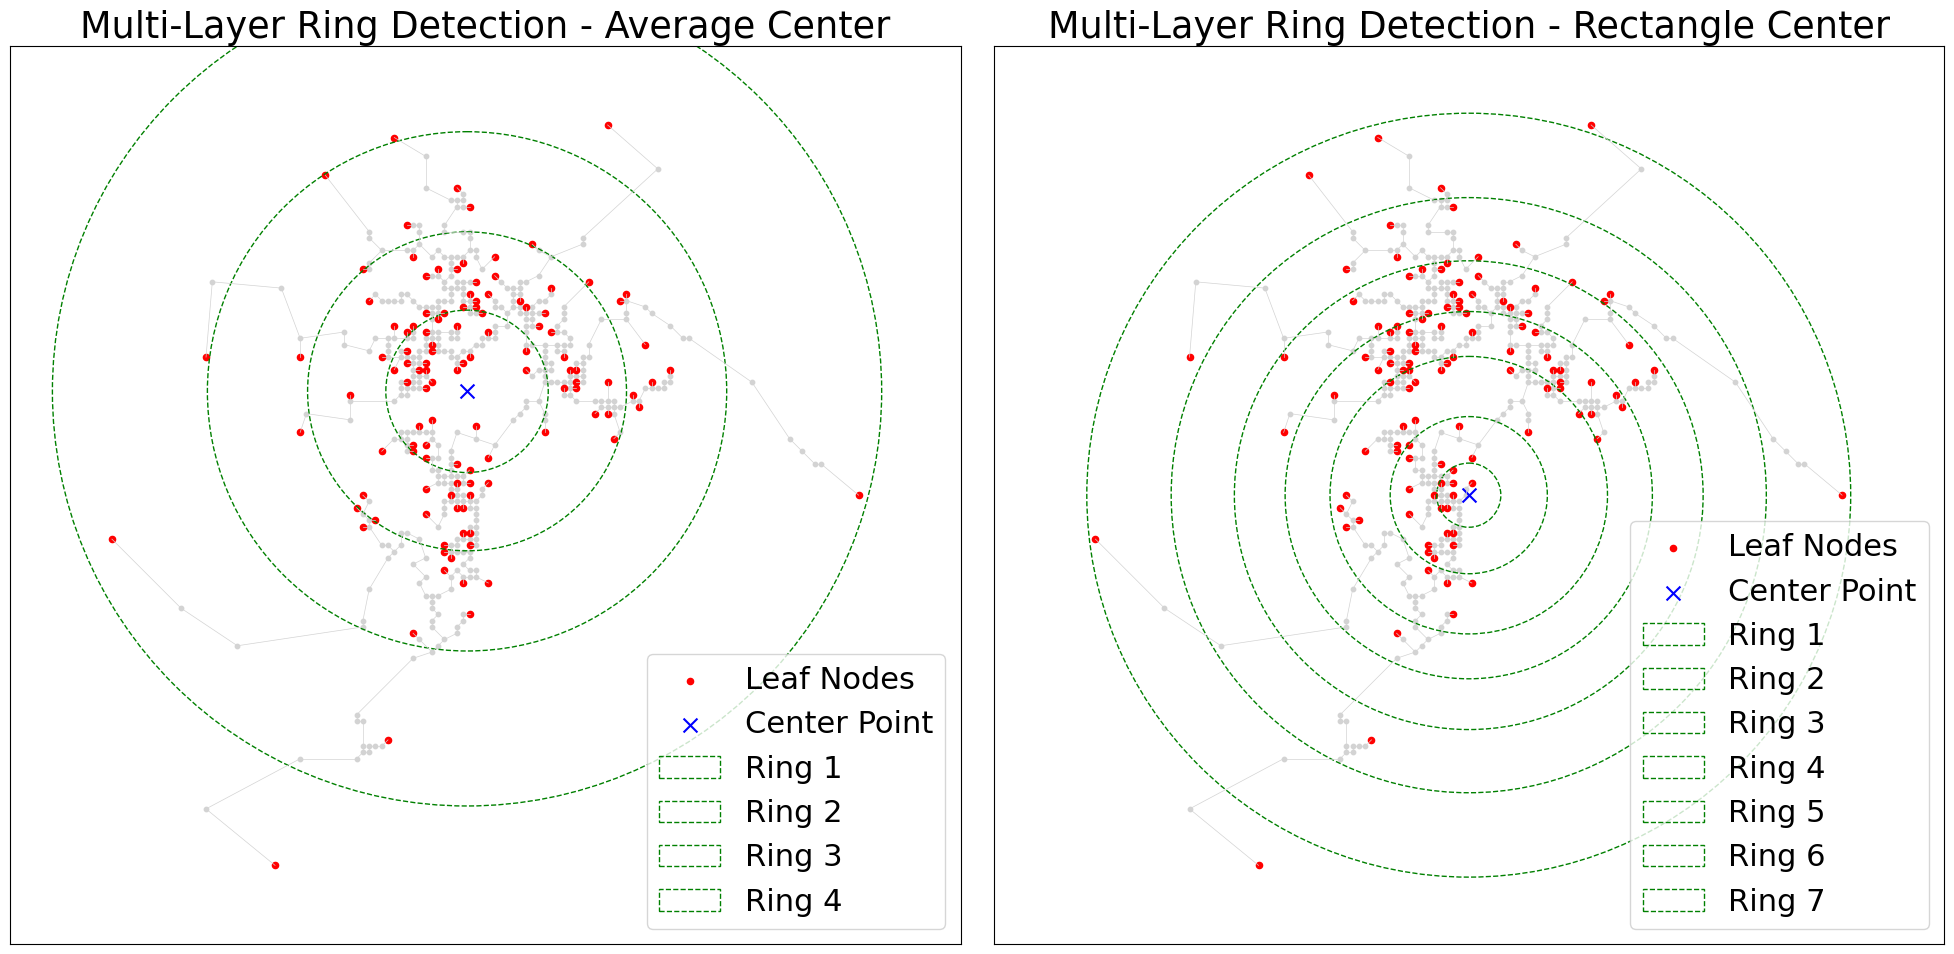

In [31]:
from graph_tool.all import Graph, graph_draw
import numpy as np
import python_codes.files_operators as fo
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 设置字体和比例
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 22

# 读取网络文件
filename = "./MST_net/tokyo_pop_500_mst.net"
read_graph, read_pos = fo.read_files(filename)

# 找出叶节点（只有一个相邻节点的节点）
leaf_nodes = [v for v in read_graph.vertices() if v.out_degree() == 1]
leaf_positions = np.array([read_pos[v] for v in leaf_nodes])
num_leaf_nodes = len(leaf_nodes)

# 计算两种中心点
center_avg = np.mean(leaf_positions, axis=0)  # 平均值中心
x_min, y_min = np.min(leaf_positions, axis=0)
x_max, y_max = np.max(leaf_positions, axis=0)
center_rect = np.array([(x_min + x_max) / 2, (y_min + y_max) / 2])  # 最小矩形中心

# 绘制两个中心点的图像对比
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

for ax, center, title in zip(axs, [center_avg, center_rect], ["Average Center", "Rectangle Center"]):
    # 计算叶节点距离中心点的距离
    distances = np.linalg.norm(leaf_positions - center, axis=1)

    # 自动确定聚类数量：使用轮廓系数
    best_score = -1
    best_clusters = 2  # 至少两个环
    for n_clusters in range(2, min(15, len(leaf_positions) // 5)):  # 尝试从2到15个环
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(distances.reshape(-1, 1))
        score = silhouette_score(distances.reshape(-1, 1), kmeans.labels_)
        if score > best_score:
            best_score = score
            best_clusters = n_clusters

    # 控制台打印信息
    print(f"{title}: Best number of rings = {best_clusters}, Silhouette Score = {best_score:.2f}, Leaf Nodes = {num_leaf_nodes}")

    # 使用最佳聚类数量进行聚类
    kmeans = KMeans(n_clusters=best_clusters, random_state=42).fit(distances.reshape(-1, 1))
    labels = kmeans.labels_

    # 聚类中心（圆环半径）
    cluster_centers = kmeans.cluster_centers_
    sorted_centers = np.sort(cluster_centers.flatten())  # 从大到小排序

    # 绘制整个网络（灰色节点和边）
    for edge in read_graph.edges():
        source = read_pos[edge.source()]
        target = read_pos[edge.target()]
        ax.plot([source[0], target[0]], [source[1], target[1]], color="lightgray", linewidth=0.5)

    # 绘制所有节点（灰色）
    for v in read_graph.vertices():
        pos = read_pos[v]
        ax.scatter(pos[0], pos[1], color="lightgray", s=10)

    # 绘制叶节点（红色）
    ax.scatter(leaf_positions[:, 0], leaf_positions[:, 1], color="red", label="Leaf Nodes", s=20)

    # 绘制中心点（蓝色）
    ax.scatter(center[0], center[1], color="blue", marker="x", s=100, label="Center Point")

    # 绘制自动识别的圆环
    for i, radius in enumerate(sorted_centers):
        circle = plt.Circle(center, radius, color="green", fill=False, linestyle="--", label=f"Ring {i+1}")
        ax.add_artist(circle)

    ax.set_title(f"Multi-Layer Ring Detection - {title}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', adjustable='datalim')
    ax.invert_yaxis()
    ax.legend()

plt.tight_layout()
plt.show()


Average Center: Best number of rings = 4, Silhouette Score = 0.60, Leaf Nodes = 117
Rectangle Center: Best number of rings = 7, Silhouette Score = 0.62, Leaf Nodes = 117


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

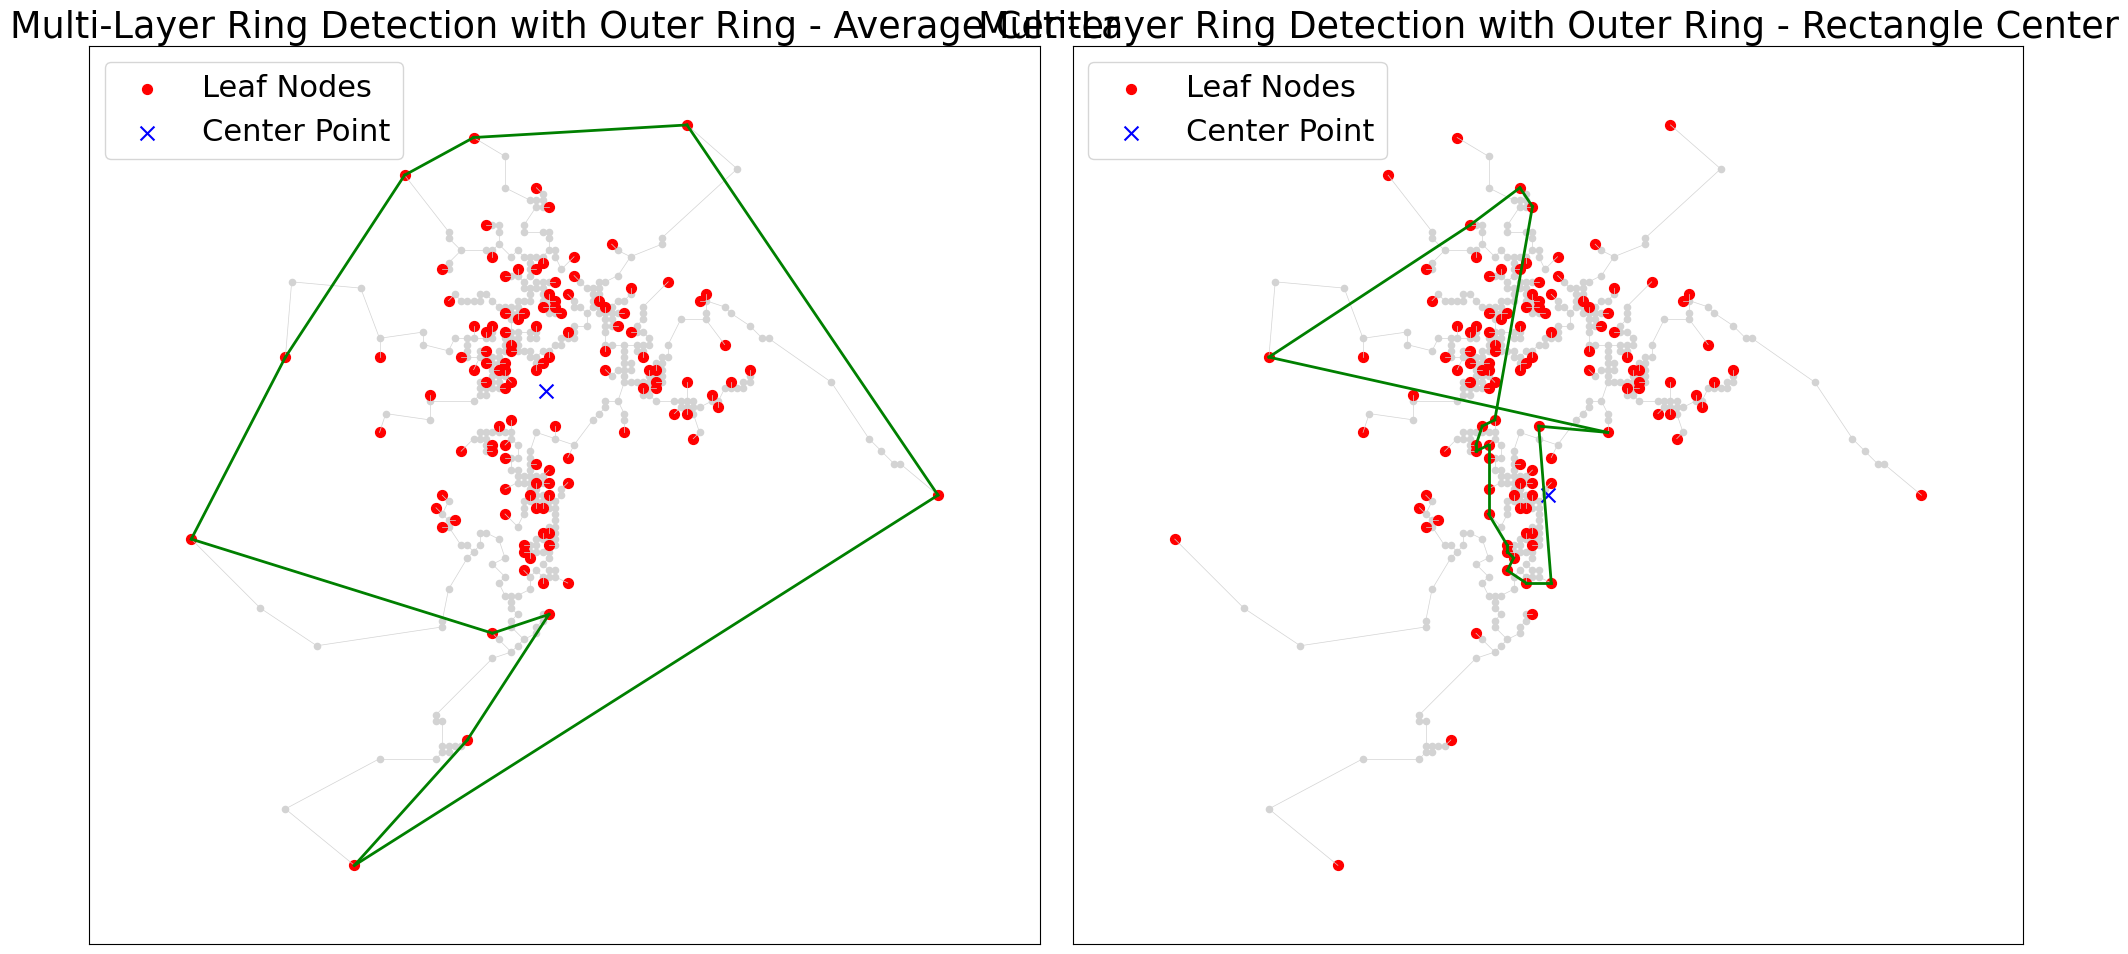

In [15]:
from graph_tool.all import Graph, graph_draw
import numpy as np
import python_codes.files_operators as fo
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# 设置字体和比例
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 22

# 读取网络文件
filename = "./MST_net/tokyo_pop_500_mst.net"
read_graph, read_pos = fo.read_files(filename)

# 找出叶节点（只有一个相邻节点的节点）
leaf_nodes = [v for v in read_graph.vertices() if v.out_degree() == 1]
leaf_positions = np.array([read_pos[v] for v in leaf_nodes])
num_leaf_nodes = len(leaf_nodes)

# 计算两种中心点
center_avg = np.mean(leaf_positions, axis=0)  # 平均值中心
x_min, y_min = np.min(leaf_positions, axis=0)
x_max, y_max = np.max(leaf_positions, axis=0)
center_rect = np.array([(x_min + x_max) / 2, (y_min + y_max) / 2])  # 最小矩形中心

# 绘制两个中心点的图像对比
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

for ax, center, title in zip(axs, [center_avg, center_rect], ["Average Center", "Rectangle Center"]):
    # 计算叶节点距离中心点的距离
    distances = np.linalg.norm(leaf_positions - center, axis=1)

    # 自动确定聚类数量：使用轮廓系数
    best_score = -1
    best_clusters = 2  # 至少两个环
    for n_clusters in range(2, min(15, len(leaf_positions) // 5)):  # 尝试从2到15个环
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(distances.reshape(-1, 1))
        score = silhouette_score(distances.reshape(-1, 1), kmeans.labels_)
        if score > best_score:
            best_score = score
            best_clusters = n_clusters

    print(f"{title}: Best number of rings = {best_clusters}, Silhouette Score = {best_score:.2f}, Leaf Nodes = {num_leaf_nodes}")

    # 使用最佳聚类数量进行聚类
    kmeans = KMeans(n_clusters=best_clusters, random_state=42).fit(distances.reshape(-1, 1))
    labels = kmeans.labels_

    # 聚类中心（圆环半径）
    cluster_centers = kmeans.cluster_centers_
    sorted_centers = np.sort(cluster_centers.flatten())  # 从大到小排序

    # 获取最外层两个环的节点
    outer_ring_labels = np.argsort(sorted_centers)[-2:]  # 取最外层两个环标签
    outer_ring_nodes = np.where((labels == outer_ring_labels[0]) | (labels == outer_ring_labels[1]))[0]
    outer_ring_positions = leaf_positions[outer_ring_nodes]

    # 构建最短路径的环状网络
    num_outer_nodes = len(outer_ring_positions)
    dist_matrix = cdist(outer_ring_positions, outer_ring_positions, metric='euclidean')
    current_node = 0
    visited = [current_node]
    path = [current_node]

    while len(visited) < num_outer_nodes:
        distances = dist_matrix[current_node]
        distances[visited] = np.inf  # 标记已访问节点为无穷大
        next_node = np.argmin(distances)
        path.append(next_node)
        visited.append(next_node)
        current_node = next_node

    path.append(path[0])  # 闭环

    # 绘制整个网络（灰色节点和边）
    for edge in read_graph.edges():
        source = read_pos[edge.source()]
        target = read_pos[edge.target()]
        ax.plot([source[0], target[0]], [source[1], target[1]], color="lightgray", linewidth=0.5)

    # 绘制所有节点（灰色）
    for v in read_graph.vertices():
        pos = read_pos[v]
        ax.scatter(pos[0], pos[1], color="lightgray", s=20)

    # 绘制叶节点（红色）
    ax.scatter(leaf_positions[:, 0], leaf_positions[:, 1], color="red", label="Leaf Nodes", s=50)

    # 绘制中心点（蓝色）
    ax.scatter(center[0], center[1], color="blue", marker="x", s=100, label="Center Point")

    # 绘制外环最短路径
    for i in range(len(path) - 1):
        p1 = outer_ring_positions[path[i]]
        p2 = outer_ring_positions[path[i + 1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color="green", linewidth=2, linestyle="-")

    ax.set_title(f"Multi-Layer Ring Detection with Outer Ring - {title}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', adjustable='datalim')
    ax.invert_yaxis()
    ax.legend()

plt.tight_layout()
plt.show()


Average Center: Best number of rings = 2, Silhouette Score = 0.61, Leaf Nodes = 1619
Average Center - Outer Ring 1 Radius: 29.34, Outer Ring 2 Radius: 12.06
Outer Ring 1 Nodes: 593, Outer Ring 2 Nodes: 1026


KeyboardInterrupt: 

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

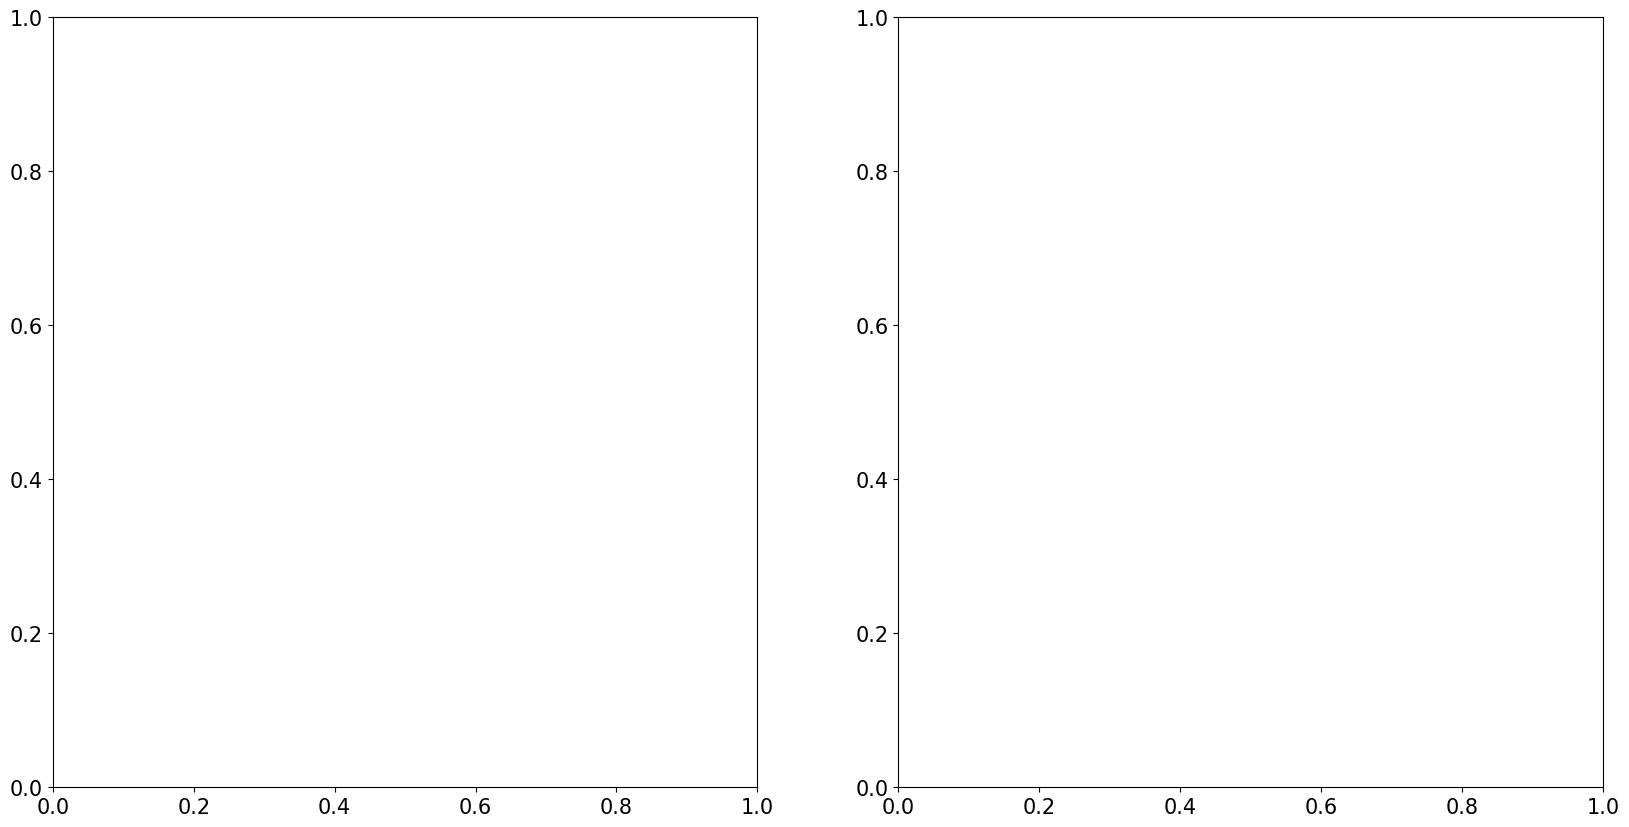

In [2]:
from graph_tool.all import Graph, graph_draw
import numpy as np
import python_codes.files_operators as fo
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# 设置字体和比例
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 15

# 读取网络文件
filename = "./MST_net/tokyo_pop_500_mst.net"
read_graph, read_pos = fo.read_files(filename)

# 找出叶节点（只有一个相邻节点的节点）
leaf_nodes = [v for v in read_graph.vertices() if v.out_degree() == 1]
leaf_positions = np.array([read_pos[v] for v in leaf_nodes])
num_leaf_nodes = len(leaf_nodes)

# 计算两种中心点
center_avg = np.mean(leaf_positions, axis=0)  # 平均值中心
x_min, y_min = np.min(leaf_positions, axis=0)
x_max, y_max = np.max(leaf_positions, axis=0)
center_rect = np.array([(x_min + x_max) / 2, (y_min + y_max) / 2])  # 最小矩形中心

# 2-OPT算法优化路径
def two_opt(route, dist_matrix):
    """
    2-OPT算法，减少路径交叉
    """
    best = route
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route) - 1):
                if j - i == 1:  # 相邻节点不交换
                    continue
                new_route = route[:i] + route[i:j][::-1] + route[j:]
                if calc_total_distance(new_route, dist_matrix) < calc_total_distance(best, dist_matrix):
                    best = new_route
                    improved = True
        route = best
    return best

def calc_total_distance(route, dist_matrix):
    """
    计算路径的总距离
    """
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += dist_matrix[route[i], route[i + 1]]
    total_distance += dist_matrix[route[-1], route[0]]  # 闭环
    return total_distance

def greedy_tsp(dist_matrix):
    """
    使用贪心算法生成初始TSP路径
    """
    num_nodes = len(dist_matrix)
    unvisited = set(range(num_nodes))
    current_node = 0
    path = [current_node]
    unvisited.remove(current_node)

    while unvisited:
        next_node = min(unvisited, key=lambda x: dist_matrix[current_node, x])
        path.append(next_node)
        unvisited.remove(next_node)
        current_node = next_node

    path.append(path[0])  # 闭环
    return path

# 绘制两个中心点的图像对比
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

for ax, center, title in zip(axs, [center_avg, center_rect], ["Average Center", "Rectangle Center"]):
    # 计算叶节点距离中心点的距离
    distances = np.linalg.norm(leaf_positions - center, axis=1)

    # 自动确定聚类数量：使用轮廓系数
    best_score = -1
    best_clusters = 2  # 至少两个环
    for n_clusters in range(2, min(15, len(leaf_positions) // 5)):  # 尝试从2到15个环
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(distances.reshape(-1, 1))
        score = silhouette_score(distances.reshape(-1, 1), kmeans.labels_)
        if score > best_score:
            best_score = score
            best_clusters = n_clusters

    print(f"{title}: Best number of rings = {best_clusters}, Silhouette Score = {best_score:.2f}, Leaf Nodes = {num_leaf_nodes}")

    # 使用最佳聚类数量进行聚类
    kmeans = KMeans(n_clusters=best_clusters, random_state=42).fit(distances.reshape(-1, 1))
    labels = kmeans.labels_

    # 聚类中心（圆环半径）
    cluster_centers = kmeans.cluster_centers_
    sorted_centers = np.sort(cluster_centers.flatten())  # 从大到小排序

    # 获取最外层两个环的节点
    sorted_labels = np.argsort(cluster_centers.flatten())[::-1]  # 从大到小排序标签
    outer_ring_labels = sorted_labels[:2]  # 取最外层两个环标签
    outer_ring_nodes = np.where((labels == outer_ring_labels[0]) | (labels == outer_ring_labels[1]))[0]
    outer_ring_positions = leaf_positions[outer_ring_nodes]

    # 打印调试信息
    print(f"{title} - Outer Ring 1 Radius: {sorted_centers[-1]:.2f}, Outer Ring 2 Radius: {sorted_centers[-2]:.2f}")
    print(f"Outer Ring 1 Nodes: {np.sum(labels == sorted_labels[0])}, Outer Ring 2 Nodes: {np.sum(labels == sorted_labels[1])}")

    # 构建最短路径的环状网络（贪心算法 + 2-OPT优化）
    num_outer_nodes = len(outer_ring_positions)
    dist_matrix = cdist(outer_ring_positions, outer_ring_positions, metric='euclidean')

    # 使用贪心算法生成初始路径
    path = greedy_tsp(dist_matrix)

    # 使用2-OPT算法优化路径
    path = two_opt(path, dist_matrix)

    # 绘制整个网络（灰色节点和边）
    for edge in read_graph.edges():
        source = read_pos[edge.source()]
        target = read_pos[edge.target()]
        ax.plot([source[0], target[0]], [source[1], target[1]], color="lightgray", linewidth=0.5)

    # 绘制所有节点（灰色）
    for v in read_graph.vertices():
        pos = read_pos[v]
        ax.scatter(pos[0], pos[1], color="lightgray", s=10)

    # 绘制叶节点（红色）
    ax.scatter(leaf_positions[:, 0], leaf_positions[:, 1], color="red", label="Leaf Nodes", s=20)

    # 绘制中心点（蓝色）
    ax.scatter(center[0], center[1], color="blue", marker="x", s=100, label="Center Point")

    # 绘制外环最短路径
    for i in range(len(path) - 1):
        p1 = outer_ring_positions[path[i]]
        p2 = outer_ring_positions[path[i + 1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color="green", linewidth=2, linestyle="-")

    ax.set_title(f"Multi-Layer Ring Detection with Outer Ring - {title}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', adjustable='datalim')
    ax.invert_yaxis()
    ax.legend()

plt.tight_layout()
#output_filename = f"tokyo_500_layer_ring_detection.png"
#plt.savefig(output_filename, format='png', dpi=300, bbox_inches='tight')
plt.show()


Average Center: Best number of rings = 4, Silhouette Score = 0.60, Leaf Nodes = 117
Average Center - Outer Ring 1 Radius: 33.04, Outer Ring 2 Radius: 20.69
Outer Ring 1 Nodes: 4, Outer Ring 2 Nodes: 6
Rectangle Center: Best number of rings = 7, Silhouette Score = 0.62, Leaf Nodes = 117
Rectangle Center - Outer Ring 1 Radius: 30.44, Outer Ring 2 Radius: 23.71
Outer Ring 1 Nodes: 6, Outer Ring 2 Nodes: 4


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

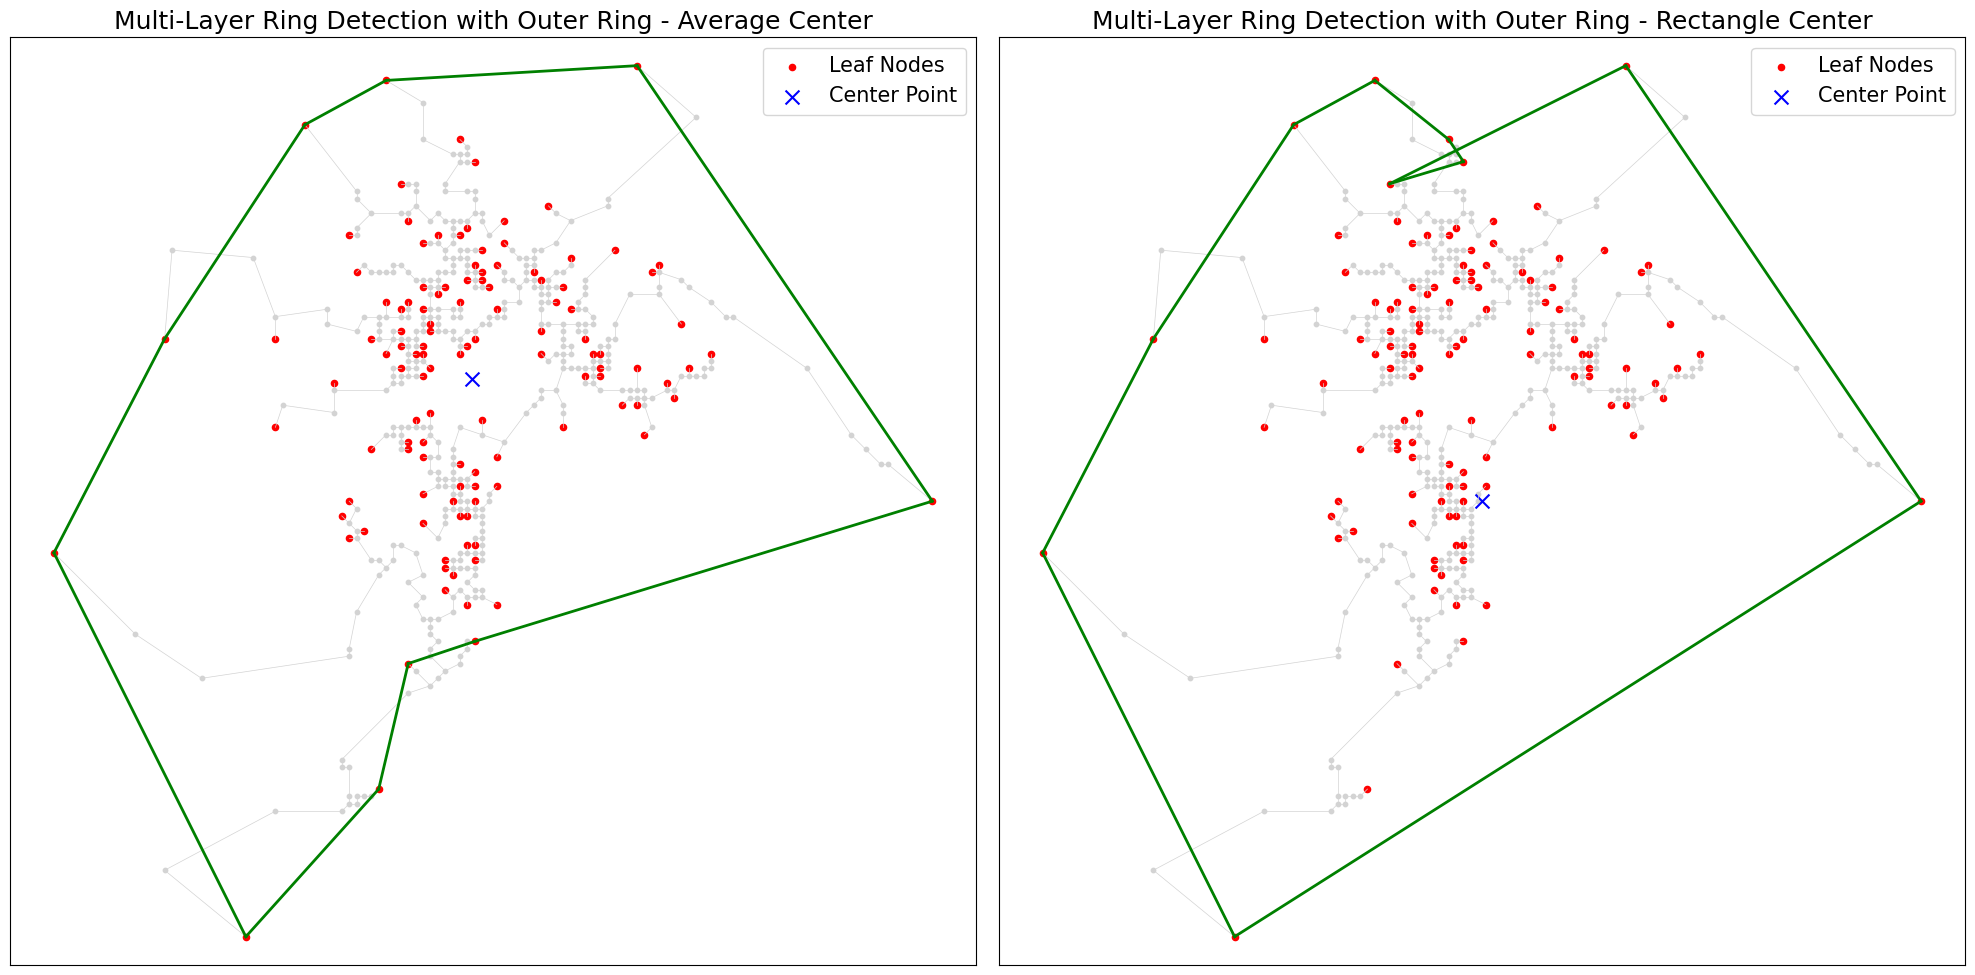

In [4]:
from graph_tool.all import Graph, graph_draw
import numpy as np
import python_codes.files_operators as fo
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# 设置字体和比例
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 15

# 读取网络文件
filename = "./MST_net/tokyo_pop_500_mst.net"
read_graph, read_pos = fo.read_files(filename)

# 找出叶节点（只有一个相邻节点的节点）
leaf_nodes = [v for v in read_graph.vertices() if v.out_degree() == 1]
leaf_positions = np.array([read_pos[v] for v in leaf_nodes])
num_leaf_nodes = len(leaf_nodes)

# 计算两种中心点
center_avg = np.mean(leaf_positions, axis=0)  # 平均值中心
x_min, y_min = np.min(leaf_positions, axis=0)
x_max, y_max = np.max(leaf_positions, axis=0)
center_rect = np.array([(x_min + x_max) / 2, (y_min + y_max) / 2])  # 最小矩形中心


# 2-OPT算法优化路径
def two_opt(route, dist_matrix):
    """
    2-OPT算法，减少路径交叉
    """
    best = route
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route) - 1):
                if j - i == 1:  # 相邻节点不交换
                    continue
                new_route = route[:i] + route[i:j][::-1] + route[j:]
                if calc_total_distance(new_route, dist_matrix) < calc_total_distance(best, dist_matrix):
                    best = new_route
                    improved = True
        route = best
    return best


def calc_total_distance(route, dist_matrix):
    """
    计算路径的总距离
    """
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += dist_matrix[route[i], route[i + 1]]
    total_distance += dist_matrix[route[-1], route[0]]  # 闭环
    return total_distance


def greedy_tsp(dist_matrix):
    """
    使用贪心算法生成初始TSP路径
    """
    num_nodes = len(dist_matrix)
    unvisited = set(range(num_nodes))
    current_node = 0
    path = [current_node]
    unvisited.remove(current_node)

    while unvisited:
        next_node = min(unvisited, key=lambda x: dist_matrix[current_node, x])
        path.append(next_node)
        unvisited.remove(next_node)
        current_node = next_node

    path.append(path[0])  # 闭环
    return path


# 绘制两个中心点的图像对比
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

for ax, center, title in zip(axs, [center_avg, center_rect], ["Average Center", "Rectangle Center"]):
    # 计算叶节点距离中心点的距离
    distances = np.linalg.norm(leaf_positions - center, axis=1)

    # 自动确定聚类数量：使用轮廓系数
    best_score = -1
    best_clusters = 2  # 至少两个环
    for n_clusters in range(2, min(15, len(leaf_positions) // 5)):  # 尝试从2到15个环
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(distances.reshape(-1, 1))
        score = silhouette_score(distances.reshape(-1, 1), kmeans.labels_)
        if score > best_score:
            best_score = score
            best_clusters = n_clusters

    print(
        f"{title}: Best number of rings = {best_clusters}, Silhouette Score = {best_score:.2f}, Leaf Nodes = {num_leaf_nodes}")

    # 使用最佳聚类数量进行聚类
    kmeans = KMeans(n_clusters=best_clusters, random_state=42).fit(distances.reshape(-1, 1))
    labels = kmeans.labels_

    # 聚类中心（圆环半径）
    cluster_centers = kmeans.cluster_centers_
    sorted_centers = np.sort(cluster_centers.flatten())  # 从大到小排序

    # 获取最外层两个环的节点
    sorted_labels = np.argsort(cluster_centers.flatten())[::-1]  # 从大到小排序标签
    outer_ring_labels = sorted_labels[:2]  # 取最外层两个环标签
    outer_ring_nodes = np.where((labels == outer_ring_labels[0]) | (labels == outer_ring_labels[1]))[0]
    outer_ring_positions = leaf_positions[outer_ring_nodes]

    # 打印调试信息
    print(f"{title} - Outer Ring 1 Radius: {sorted_centers[-1]:.2f}, Outer Ring 2 Radius: {sorted_centers[-2]:.2f}")
    print(
        f"Outer Ring 1 Nodes: {np.sum(labels == sorted_labels[0])}, Outer Ring 2 Nodes: {np.sum(labels == sorted_labels[1])}")

    # 构建最短路径的环状网络（贪心算法 + 2-OPT优化）
    num_outer_nodes = len(outer_ring_positions)
    dist_matrix = cdist(outer_ring_positions, outer_ring_positions, metric='euclidean')

    # 使用贪心算法生成初始路径
    path = greedy_tsp(dist_matrix)

    # 使用2-OPT算法优化路径
    path = two_opt(path, dist_matrix)

    # 绘制整个网络（灰色节点和边）
    for edge in read_graph.edges():
        source = read_pos[edge.source()]
        target = read_pos[edge.target()]
        ax.plot([source[0], target[0]], [source[1], target[1]], color="lightgray", linewidth=0.5)

    # 绘制所有节点（灰色）
    for v in read_graph.vertices():
        pos = read_pos[v]
        ax.scatter(pos[0], pos[1], color="lightgray", s=10)

    # 绘制叶节点（红色）
    ax.scatter(leaf_positions[:, 0], leaf_positions[:, 1], color="red", label="Leaf Nodes", s=20)

    # 绘制中心点（蓝色）
    ax.scatter(center[0], center[1], color="blue", marker="x", s=100, label="Center Point")

    # 绘制外环最短路径
    for i in range(len(path) - 1):
        p1 = outer_ring_positions[path[i]]
        p2 = outer_ring_positions[path[i + 1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color="green", linewidth=2, linestyle="-")

    ax.set_title(f"Multi-Layer Ring Detection with Outer Ring - {title}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', adjustable='datalim')
    ax.invert_yaxis()
    ax.legend()

plt.tight_layout()
plt.show()
